In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read csv file
df=pd.read_csv("/content/drive/MyDrive/NLP-Project/archive.zip (Unzipped Files)/train.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
#shape 
df.shape

(31962, 3)

In [ ]:
#columns
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [ ]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
#Check sum of non null values
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
#label count
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

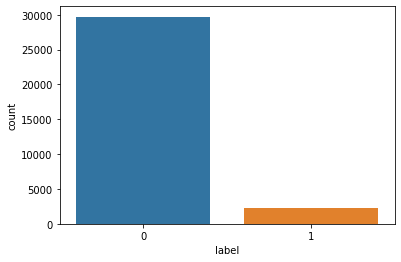

In [ ]:
#label countplot
ax=sns.countplot(df.label)

# Text Preprocessing & Analysis

In [ ]:
# removing usernames from tweet
df['new_tweet'] = df.tweet.str.replace('@user', '')
df.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
#Removing Punctuations, Numbers, and Special Characters
df['new_tweet'] = df['new_tweet'].str.replace("[^a-zA-Z#]", " ")
df['new_tweet'] = df['new_tweet'].str.replace("#", "")
df.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [ ]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(df['new_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())   
a=Counter(all_words).most_common(10)
a

[('the', 10238),
 ('to', 9866),
 ('i', 7622),
 ('a', 6540),
 ('you', 5949),
 ('and', 4945),
 ('in', 4704),
 ('for', 4510),
 ('of', 4261),
 ('is', 4196)]

# Tokenization

In [ ]:
#split the tokens
df['new_tweet'] = df['new_tweet'].apply(lambda x: x.split())
df.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


# Stemming

In [ ]:
import nltk
stemmer = nltk.PorterStemmer()
df['new_tweet']= df['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can, t, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


# Stopwords

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#extending new stopwords
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)

# punctuation

In [ ]:
import string 
from string import punctuation
def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [ ]:
df['new_tweet'] = df['new_tweet'].apply(process)

# wordcloud

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# split sentences to get individual words
words = []
for line in df['new_tweet']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   )
wc.generate_from_frequencies(wordfreq)

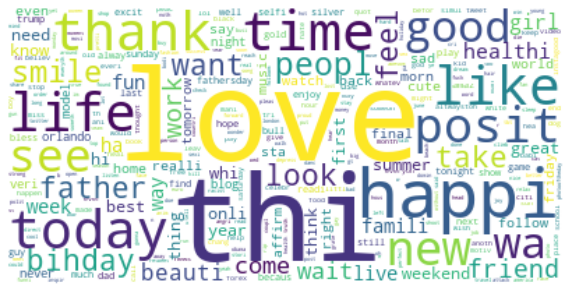

In [ ]:
plt.figure(figsize=(10,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
           
df['new_tweet'] = df['new_tweet'].apply(string)
df.head()  

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,drag selfish kid dysfunct father hi run
1,2,0,@user @user thanks for #lyft credit i can't us...,offer van pdx use credit wheelchair caus lyft ...
2,3,0,bihday your majesty,majesti bihday
3,4,0,#model i love u take with u all the time in ...,time love take model
4,5,0,factsguide: society now #motivation,factsguid societi motiv


# positive tweets

In [ ]:
#positive tweets
positive = [r for r in df['new_tweet'][df['label']==0]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   )
wc.generate(pos)

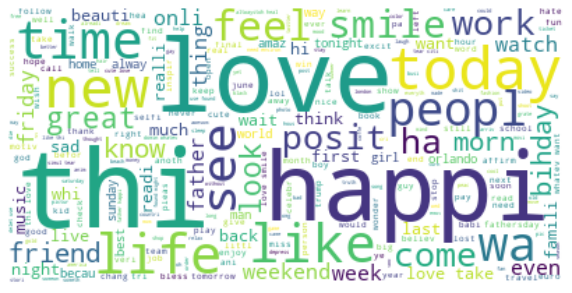

In [ ]:
plt.figure(figsize=(10,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# negative tweets

In [ ]:
#negative tweets
negative = [r for r in df['new_tweet'][df['label']==1]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wc = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   )
wc.generate(neg)

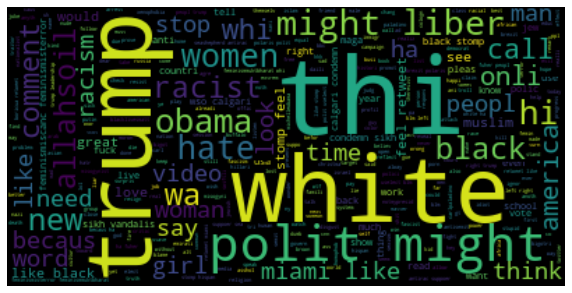

In [ ]:
plt.figure(figsize=(10,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Bag of words

In [ ]:
df.drop(["id","tweet" ],axis=1,inplace=True)
df.head()

,label,new_tweet
0,0,drag selfish kid dysfunct father hi run
1,0,offer van pdx use credit wheelchair caus lyft ...
2,0,majesti bihday
3,0,time love take model
4,0,factsguid societi motiv


# Remove emoji

In [ ]:
! pip install emoji
import emoji
df["new_tweet"] = df["new_tweet"].apply(emoji.demojize)
df.head()

,label,new_tweet
0,0,drag selfish kid dysfunct father hi run
1,0,offer van pdx use credit wheelchair caus lyft ...
2,0,majesti bihday
3,0,time love take model
4,0,factsguid societi motiv


# Data augmentation for balancing the data.

In [ ]:
!pip install transformers
!pip install nlpaug

In [ ]:
import nlpaug.augmenter.char.random as aug

In [ ]:
augmenter = aug.RandomCharAug(action='swap')

In [ ]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

fom above we can see our data is not stable.

In [ ]:
from sklearn.utils import shuffle
def augmentMyData(df, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['label'] == 1].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(spam_df['new_tweet'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'label': 1,
        'new_tweet': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [ ]:
from tqdm.auto import tqdm
aug_df = augmentMyData(df, augmenter, samples=20200)

  0%|          | 0/20200 [00:00<?, ?it/s]

In [ ]:
aug_df["label"].value_counts()

0    29720
1    22442
Name: label, dtype: int64

from above count we can see after adding samples now our data is most likely stable.

# Feature & Target

In [ ]:
X = aug_df["new_tweet"]
y = aug_df["label"]

# Train test split

In [ ]:
#Split data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
df1 = pd.concat([X_train,y_train], axis =1)
df1.head()

,new_tweet,label
42123,rejtec mil byocott hatr pa hi busi putinschoic...,1
24192,chop knock newyear obes pride america better l...,1
38004,tarehcer isra onli anti settlement obama semit...,1
50991,law mdea voter republican aner rpecsi surgic o...,1
7395,semifin thank prepar geohitch staup voom sta,0


# Text classification using ML

# Countvectorize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train_cv, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = model.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8958
           1       0.95      0.96      0.95      6691

    accuracy                           0.96     15649
   macro avg       0.96      0.96      0.96     15649
weighted avg       0.96      0.96      0.96     15649



# TF-IDF vectorize

In [ ]:
# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words="english")
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [ ]:
model1 = RandomForestClassifier(n_estimators=200)
model1.fit(X_train_tf, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = model1.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8958
           1       0.94      0.94      0.94      6691

    accuracy                           0.95     15649
   macro avg       0.95      0.95      0.95     15649
weighted avg       0.95      0.95      0.95     15649



from above classification report we can see using random forest algorithm we get 94% recall & 95% accuracy.

# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(random_state=400 )
model2.fit(X_train_cv, y_train)

LogisticRegression(random_state=400)

In [ ]:
y_pred = model2.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8958
           1       0.95      0.94      0.95      6691

    accuracy                           0.96     15649
   macro avg       0.95      0.95      0.95     15649
weighted avg       0.96      0.96      0.96     15649



from above classification report we can see using logisticRegression algorithm we get 94% recall & 96% accuracy.

In [ ]:
model3 = LogisticRegression(random_state=400 )
model3.fit(X_train_tf, y_train)

LogisticRegression(random_state=400)

In [ ]:
y_pred = model3.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8958
           1       0.93      0.94      0.93      6691

    accuracy                           0.94     15649
   macro avg       0.94      0.94      0.94     15649
weighted avg       0.94      0.94      0.94     15649



# Text Classification using Neural network

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten

# Tokenization

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

tokenizer.index_word

{1: 'thi',
 2: 'love',
 3: 'happi',
 4: 'like',
 5: 'trump',
 6: 'wa',
 7: 'new',
 8: 'peopl',
 9: 'time',
 10: 'thank',
 11: 'whi',
 12: 'hi',
 13: 'ha',
 14: 'today',
 15: 'white',
 16: 'say',
 17: 'feel',
 18: 'see',
 19: 'life',
 20: 'black',
 21: 'good',
 22: 'posit',
 23: 'want',
 24: 'look',
 25: 'take',
 26: 'come',
 27: 'girl',
 28: 'smile',
 29: 'work',
 30: 'racist',
 31: 'onli',
 32: 'sjw',
 33: 'father',
 34: 'way',
 35: 'polit',
 36: 'need',
 37: 'year',
 38: 'hate',
 39: 'right',
 40: 'bihday',
 41: 'friend',
 42: 'live',
 43: 'think',
 44: 'wait',
 45: 'famili',
 46: 'great',
 47: 'call',
 48: 'back',
 49: 'fun',
 50: 'know',
 51: 'liber',
 52: 'beauti',
 53: 'week',
 54: 'allahsoil',
 55: 'might',
 56: 'guy',
 57: 'obama',
 58: 'never',
 59: 'becaus',
 60: 'man',
 61: 'healthi',
 62: 'realli',
 63: 'world',
 64: 'even',
 65: 'women',
 66: 'show',
 67: 'thing',
 68: 'watch',
 69: 'best',
 70: 'listen',
 71: 'weekend',
 72: 'first',
 73: 'retweet',
 74: 'use',
 75: 'hope

In [ ]:
vocab_length = len(tokenizer.index_word)
vocab_length

43010

## text to sequence

In [ ]:
train_sequence = tokenizer.texts_to_sequences(X_train)

In [ ]:
# document length
doc_length = []
for doc in train_sequence:
    doc_length.append(len(doc))
max(doc_length)

20

In [ ]:
np.quantile(doc_length,0.99)

14.0

In [ ]:
max_len = 14
train_matrix = sequence.pad_sequences(train_sequence,maxlen=max_len)
train_matrix

array([[    0,     0,     0, ...,   699,   247,  3188],
       [    0,     0,     0, ...,   676,   156,  1642],
       [    0,     0,     0, ..., 15538,   799,   237],
       ...,
       [    0,     0,     0, ..., 43007, 43008,  9677],
       [    0,     0,     0, ...,   134,   454,   536],
       [    0,     0,     0, ...,     0,     0, 12747]], dtype=int32)

In [ ]:
# test data
test_sequence = tokenizer.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,maxlen=max_len)
test_matrix

array([[    0,     0,     0, ...,    79,     2,    86],
       [    0,     0,     0, ...,    15,     6,  1824],
       [    0,     0,     0, ...,   965,    22,   100],
       ...,
       [    0,     0,     0, ...,   167,  1698,     3],
       [    0,     0,     0, ...,   215,    81,  3104],
       [    0,     0,     0, ...,  1996,   549, 21756]], dtype=int32)

# Neural network

In [ ]:
model4 = Sequential()
model4.add(Embedding(input_dim = vocab_length+1, 
                    output_dim = 50, 
                    input_length=max_len, 
                    mask_zero=True)) 
model4.add(Flatten())
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 50)            2150550   
                                                                 
 flatten (Flatten)           (None, 700)               0         
                                                                 
Total params: 2,150,550
Trainable params: 2,150,550
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.add(Dense(64,activation="tanh"))
model4.add(Dense(64,activation="tanh"))
model4.add(Dense(1,activation="sigmoid"))

In [ ]:
model4.compile(optimizer="adam",loss="binary_crossentropy")
model4.fit(train_matrix,y_train,epochs=5,batch_size=32)

Epoch 1/5
1142/1142 [==============================] - 26s 23ms/step - loss: 0.1620
Epoch 2/5
1142/1142 [==============================] - 26s 23ms/step - loss: 0.0136
Epoch 3/5
1142/1142 [==============================] - 27s 24ms/step - loss: 0.0052
Epoch 4/5
1142/1142 [==============================] - 26s 23ms/step - loss: 0.0041
Epoch 5/5
1142/1142 [==============================] - 26s 23ms/step - loss: 0.0037


In [ ]:
y_pred = model4.predict(test_matrix)

In [ ]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8958
           1       0.97      0.88      0.92      6691

    accuracy                           0.94     15649
   macro avg       0.94      0.93      0.94     15649
weighted avg       0.94      0.94      0.94     15649



from above classification we get 88% recall value & 94% accuracy for neural network.

# Sentiment Analysis using sequence model

In [ ]:
from tensorflow.keras.layers import Dense,SimpleRNN, LSTM, GRU, Bidirectional 

# RNN Layer

In [ ]:
model5 = Sequential()
model5.add(Embedding( input_dim=vocab_length+1,
                     output_dim=50,
                     input_length=max_len,
                     mask_zero=True))
model5.add(SimpleRNN(50))
model5.add(Dense(64, activation="relu"))
model5.add(Dense(32, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

In [ ]:
model5.compile(optimizer="adam",loss="binary_crossentropy")
model5.fit(train_matrix,y_train,epochs=5,batch_size=64)

Epoch 1/5
571/571 [==============================] - 18s 29ms/step - loss: 0.1987
Epoch 2/5
571/571 [==============================] - 16s 29ms/step - loss: 0.0202
Epoch 3/5
571/571 [==============================] - 16s 29ms/step - loss: 0.0056
Epoch 4/5
571/571 [==============================] - 16s 29ms/step - loss: 0.0031
Epoch 5/5
571/571 [==============================] - 17s 29ms/step - loss: 0.0051


In [ ]:
y_pred = model5.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8958
           1       0.96      0.93      0.94      6691

    accuracy                           0.95     15649
   macro avg       0.95      0.95      0.95     15649
weighted avg       0.95      0.95      0.95     15649



# Multilayer RNN

In [ ]:
model6 = Sequential()
model6.add(Embedding( input_dim=vocab_length+1,
                     output_dim=50,
                     input_length=max_len,
                     mask_zero=True))
model6.add(SimpleRNN(50, return_sequences=True))
model6.add(SimpleRNN(50, return_sequences=True))
model6.add(SimpleRNN(50))
model6.add(Dense(64, activation="relu"))
model6.add(Dense(32, activation="relu"))
model6.add(Dense(1, activation="sigmoid"))

In [ ]:
model6.compile(optimizer="adam",loss="binary_crossentropy")
model6.fit(train_matrix,y_train,epochs=5,batch_size=64)

Epoch 1/5
571/571 [==============================] - 27s 41ms/step - loss: 0.2018
Epoch 2/5
571/571 [==============================] - 23s 41ms/step - loss: 0.0229
Epoch 3/5
571/571 [==============================] - 23s 41ms/step - loss: 0.0083
Epoch 4/5
571/571 [==============================] - 23s 41ms/step - loss: 0.0058
Epoch 5/5
571/571 [==============================] - 23s 41ms/step - loss: 0.0058


In [ ]:
y_pred = model6.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8958
           1       0.97      0.93      0.95      6691

    accuracy                           0.96     15649
   macro avg       0.96      0.95      0.96     15649
weighted avg       0.96      0.96      0.96     15649



# Bidirectional RNN

In [ ]:
model7 = Sequential()
model7.add(Embedding( input_dim=vocab_length+1,
                     output_dim=50,
                     input_length=max_len,
                     mask_zero=True))
model7.add(Bidirectional(SimpleRNN(50)))
model7.add(Dense(64, activation="relu"))
model7.add(Dense(32, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))

In [ ]:
model7.compile(optimizer="adam",loss="binary_crossentropy")
model7.fit(train_matrix,y_train,epochs=5,batch_size=64)

Epoch 1/5
571/571 [==============================] - 23s 35ms/step - loss: 0.1944
Epoch 2/5
571/571 [==============================] - 20s 35ms/step - loss: 0.0130
Epoch 3/5
571/571 [==============================] - 20s 35ms/step - loss: 0.0054
Epoch 4/5
571/571 [==============================] - 20s 35ms/step - loss: 0.0046
Epoch 5/5
571/571 [==============================] - 20s 35ms/step - loss: 0.0053


In [ ]:
y_pred = model7.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8958
           1       0.97      0.90      0.93      6691

    accuracy                           0.94     15649
   macro avg       0.95      0.94      0.94     15649
weighted avg       0.94      0.94      0.94     15649



from above classification for RNN, we get, 
simple RNN= 93% recall & 95% accuracy,
Multilayer RNN= 93% recall & 96% accuracy,
Bidirectional RNN= 90% recall & 94% accuracy

# LSTM

In [ ]:
model8 = Sequential()
model8.add(Embedding( input_dim=vocab_length+1,
                     output_dim=50,
                     input_length=max_len,
                     mask_zero=True))
model8.add(LSTM(50))
model8.add(Dense(64, activation="relu"))
model8.add(Dense(32, activation="relu"))
model8.add(Dense(1, activation="sigmoid"))

In [ ]:
model8.compile(optimizer="adam",loss="binary_crossentropy")
model8.fit(train_matrix,y_train,epochs=5,batch_size=64)

Epoch 1/5
571/571 [==============================] - 25s 36ms/step - loss: 0.1997
Epoch 2/5
571/571 [==============================] - 21s 36ms/step - loss: 0.0351
Epoch 3/5
571/571 [==============================] - 21s 36ms/step - loss: 0.0156
Epoch 4/5
571/571 [==============================] - 21s 36ms/step - loss: 0.0100
Epoch 5/5
571/571 [==============================] - 21s 36ms/step - loss: 0.0060


In [ ]:
y_pred = model8.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8958
           1       0.97      0.94      0.96      6691

    accuracy                           0.96     15649
   macro avg       0.96      0.96      0.96     15649
weighted avg       0.96      0.96      0.96     15649



# Multilayer LSTM

In [ ]:
model9 = Sequential()
model9.add(Embedding( input_dim=vocab_length+1,
                     output_dim=50,
                     input_length=max_len,
                     mask_zero=True))
model9.add(LSTM(50, return_sequences=True))
model9.add(LSTM(50, return_sequences=True))
model9.add(LSTM(50))
model9.add(Dense(64, activation="relu"))
model9.add(Dense(32, activation="relu"))
model9.add(Dense(1, activation="sigmoid"))

In [ ]:
model9.compile(optimizer="adam",loss="binary_crossentropy")
model9.fit(train_matrix,y_train,epochs=5,batch_size=64)

Epoch 1/5
571/571 [==============================] - 49s 64ms/step - loss: 0.1983
Epoch 2/5
571/571 [==============================] - 37s 64ms/step - loss: 0.0363
Epoch 3/5
571/571 [==============================] - 37s 65ms/step - loss: 0.0150
Epoch 4/5
571/571 [==============================] - 37s 64ms/step - loss: 0.0085
Epoch 5/5
571/571 [==============================] - 37s 64ms/step - loss: 0.0075


In [ ]:
y_pred = model9.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8958
           1       0.96      0.96      0.96      6691

    accuracy                           0.97     15649
   macro avg       0.96      0.96      0.96     15649
weighted avg       0.97      0.97      0.97     15649



# Bidirectional LSTM

In [ ]:
model10 = Sequential()
model10.add(Embedding( input_dim=vocab_length+1,
                     output_dim=50,
                     input_length=max_len,
                     mask_zero=True))
model10.add(Bidirectional(LSTM(50)))
model10.add(Dense(64, activation="relu"))
model10.add(Dense(32, activation="relu"))
model10.add(Dense(1, activation="sigmoid"))

In [ ]:
model10.compile(optimizer="adam",loss="binary_crossentropy")
model10.fit(train_matrix,y_train,epochs=5,batch_size=64)

Epoch 1/5
571/571 [==============================] - 35s 47ms/step - loss: 0.1904
Epoch 2/5
571/571 [==============================] - 26s 46ms/step - loss: 0.0327
Epoch 3/5
571/571 [==============================] - 27s 47ms/step - loss: 0.0155
Epoch 4/5
571/571 [==============================] - 26s 46ms/step - loss: 0.0081
Epoch 5/5
571/571 [==============================] - 27s 46ms/step - loss: 0.0068


In [ ]:
y_pred = model10.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8958
           1       0.97      0.95      0.96      6691

    accuracy                           0.96     15649
   macro avg       0.96      0.96      0.96     15649
weighted avg       0.96      0.96      0.96     15649



from above classification for LSTM, we get, 
LSTM= 94% recall & 96% accuracy,
Multilayer LSTM= 96% recall & 97% accuracy,
Bidirectional LSTM= 95% recall & 96% accuracy

# GRU

In [ ]:
model11 = Sequential()
model11.add(Embedding( input_dim=vocab_length+1,
                     output_dim=50,
                     input_length=max_len,
                     mask_zero=True))
model11.add(GRU(50))
model11.add(Dense(64, activation="relu"))
model11.add(Dense(32, activation="relu"))
model11.add(Dense(1, activation="sigmoid"))

In [ ]:
model11.compile(optimizer="adam",loss="binary_crossentropy")
model11.fit(train_matrix,y_train,epochs=5,batch_size=64)

Epoch 1/5
571/571 [==============================] - 24s 34ms/step - loss: 0.1966
Epoch 2/5
571/571 [==============================] - 19s 34ms/step - loss: 0.0361
Epoch 3/5
571/571 [==============================] - 19s 34ms/step - loss: 0.0178
Epoch 4/5
571/571 [==============================] - 20s 34ms/step - loss: 0.0117
Epoch 5/5
571/571 [==============================] - 19s 34ms/step - loss: 0.0091


In [ ]:
y_pred = model11.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8958
           1       0.97      0.94      0.96      6691

    accuracy                           0.96     15649
   macro avg       0.96      0.96      0.96     15649
weighted avg       0.96      0.96      0.96     15649



# Multilayer GRU

In [ ]:
model12 = Sequential()
model12.add(Embedding( input_dim=vocab_length+1,
                     output_dim=50,
                     input_length=max_len,
                     mask_zero=True))
model12.add(GRU(50, return_sequences=True))
model12.add(GRU(50, return_sequences=True))
model12.add(GRU(50))
model12.add(Dense(64, activation="relu"))
model12.add(Dense(32, activation="relu"))
model12.add(Dense(1, activation="sigmoid"))

In [ ]:
model12.compile(optimizer="adam",loss="binary_crossentropy")
model12.fit(train_matrix,y_train,epochs=5,batch_size=64)

Epoch 1/5
571/571 [==============================] - 45s 59ms/step - loss: 0.1885
Epoch 2/5
571/571 [==============================] - 34s 59ms/step - loss: 0.0354
Epoch 3/5
571/571 [==============================] - 34s 59ms/step - loss: 0.0167
Epoch 4/5
571/571 [==============================] - 34s 59ms/step - loss: 0.0105
Epoch 5/5
571/571 [==============================] - 34s 59ms/step - loss: 0.0092


In [ ]:
y_pred = model12.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8958
           1       0.96      0.95      0.96      6691

    accuracy                           0.96     15649
   macro avg       0.96      0.96      0.96     15649
weighted avg       0.96      0.96      0.96     15649



# Bidirectional GRU

In [ ]:
model13 = Sequential()
model13.add(Embedding( input_dim=vocab_length+1,
                     output_dim=50,
                     input_length=max_len,
                     mask_zero=True))
model13.add(Bidirectional(GRU(50)))
model13.add(Dense(64, activation="relu"))
model13.add(Dense(32, activation="relu"))
model13.add(Dense(1, activation="sigmoid"))

In [ ]:
model13.compile(optimizer="adam",loss="binary_crossentropy")
model13.fit(train_matrix,y_train,epochs=5,batch_size=64)

Epoch 1/5
571/571 [==============================] - 33s 43ms/step - loss: 0.1892
Epoch 2/5
571/571 [==============================] - 24s 43ms/step - loss: 0.0327
Epoch 3/5
571/571 [==============================] - 25s 43ms/step - loss: 0.0129
Epoch 4/5
571/571 [==============================] - 24s 43ms/step - loss: 0.0073
Epoch 5/5
571/571 [==============================] - 24s 43ms/step - loss: 0.0063


In [ ]:
y_pred = model13.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8958
           1       0.97      0.94      0.96      6691

    accuracy                           0.96     15649
   macro avg       0.97      0.96      0.96     15649
weighted avg       0.96      0.96      0.96     15649



from above classification for GRU, we get, 
GRU= 94% recall & 96% accuracy,
Multilayer GRU= 95% recall & 96% accuracy,
Bidirectional GRU= 94% recall & 96% accuracy